In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt    

In [2]:
image_1 = cv2.imread('doc1.bmp', cv2.IMREAD_GRAYSCALE)
image_2 = cv2.imread('doc2.bmp', cv2.IMREAD_GRAYSCALE)
image_3 = cv2.imread('doc3.bmp', cv2.IMREAD_GRAYSCALE)
image_ex = cv2.imread('pout.bmp', cv2.IMREAD_GRAYSCALE)

In [3]:

def binarize(img, threshold):
    img = img.copy()
    # Binariza a imagem
    # 0 para pixels com intensidade menor que o threshold
    img[img < threshold] = 0
    # 255 para pixels com intensidade maior ou igual ao threshold
    img[img >= threshold] = 255
    return img

def plot(original_image, binarized_image):
    fig, axs = plt.subplots(1, 2, figsize=(13, 13))
    axs[0].imshow(original_image, cmap='gray')
    axs[0].set_title('Original')
    axs[1].imshow(binarized_image, cmap='gray')
    axs[1].set_title('Binarized')
    plt.show()
    
def plot_histogram(titles, histograms, L):
    
    fig, axs = plt.subplots(1, len(histograms), figsize=(12, 5))
    
    for i in range(len(histograms)):
        axs[i].stairs(histograms[i].ravel(), color='k')
        axs[i].set_title(titles[i])
        axs[i].set_xlim([0, L])
        axs[i].set_xlabel('Intensidade do Pixel')
        axs[i].set_ylabel('Número de Pixels')
    plt.tight_layout()
    plt.show()
    
def equalization(image, histogram):
    '''
    Equalizes the histogram of the given image to improve contrast.

    The histogram equalization technique adjusts the distribution of intensities
    of pixels to span the entire color spectrum, potentially enhancing
    image details.    
    '''
    T = image.shape[0] * image.shape[1] # amount of pixels
    
    image_type = image.dtype
    L = np.iinfo(image_type).max + 1 # number of gray levels (256 for 8 bits)
    
    equalized_values = np.zeros(L)
    for j in range(1, L):    
        k = 0
        for i in range(j):
            k += histogram[i]
        k = k/T
        
        equalized_values[j] = k
    
    # Mapea os pixels da imagem original para os valores equalizados
    equalized_image = equalized_values[image]
    
    # Normalize the image to 0-255 range
    equalized_image = equalized_image * (L - 1)
    
    # Atribui o mesmo tipo da imagem original
    equalized_image = equalized_image.astype(image_type)
    
    return equalized_image


# Imagem 1

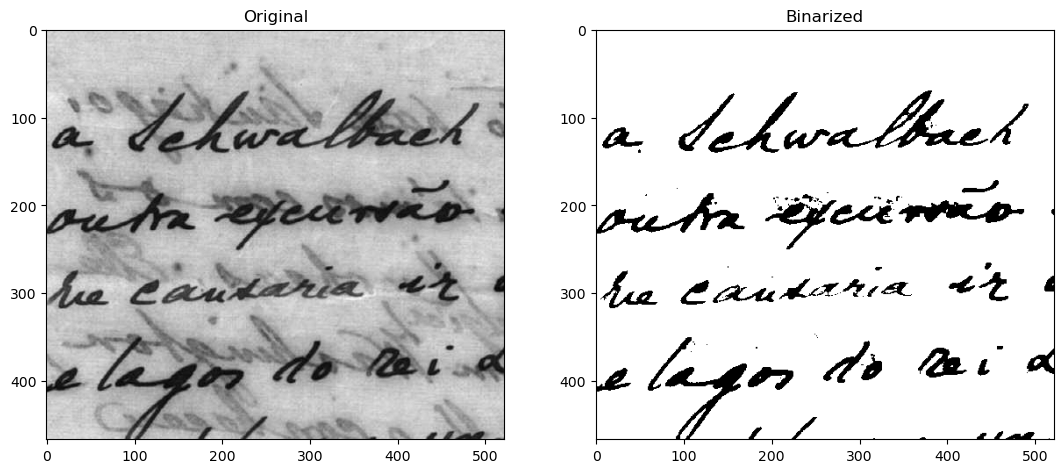

In [4]:
plot(image_1, binarize(image_1, 58)) #58 52

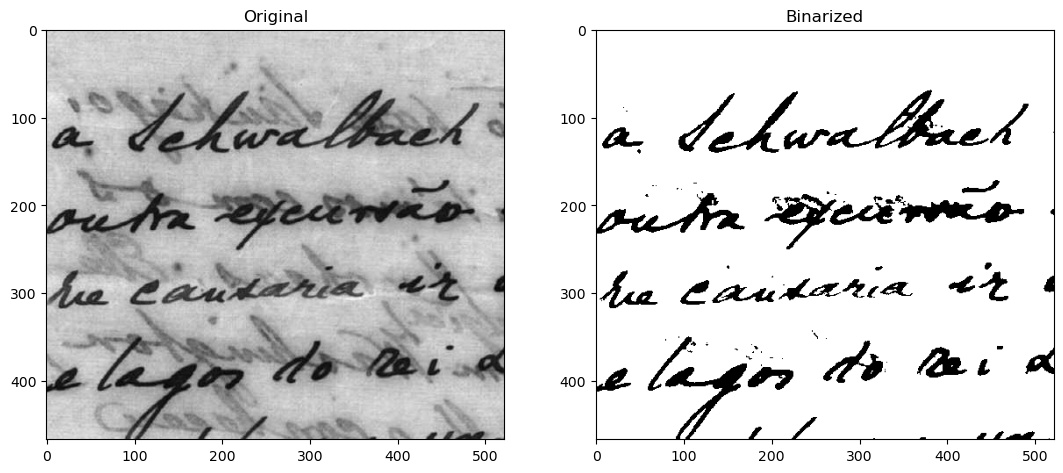

In [5]:
plot(image_1, binarize(image_1, 64)) #58

# Imagem 2

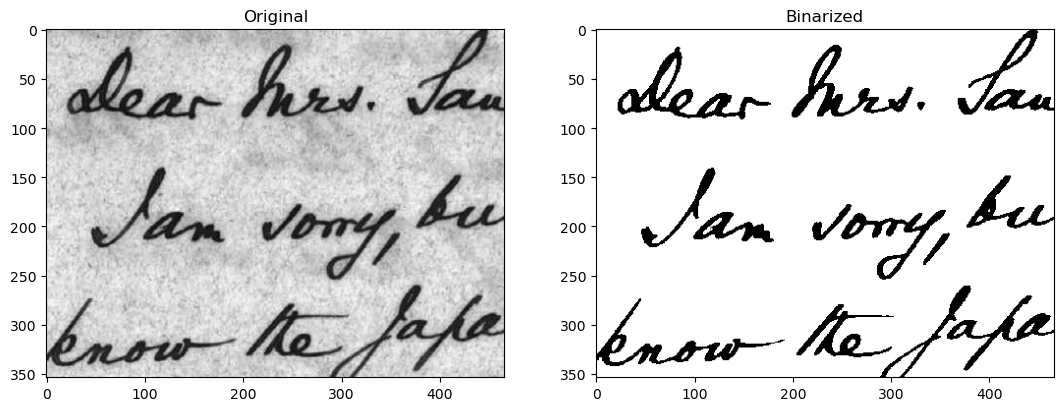

In [6]:
plot(image_2, binarize(image_2, 64))

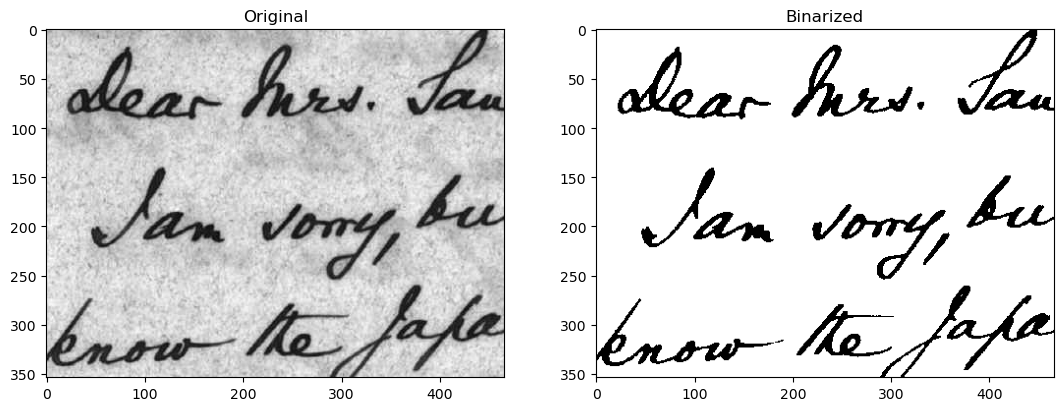

In [7]:
plot(image_2, binarize(image_2, 58))

# Imagem 3

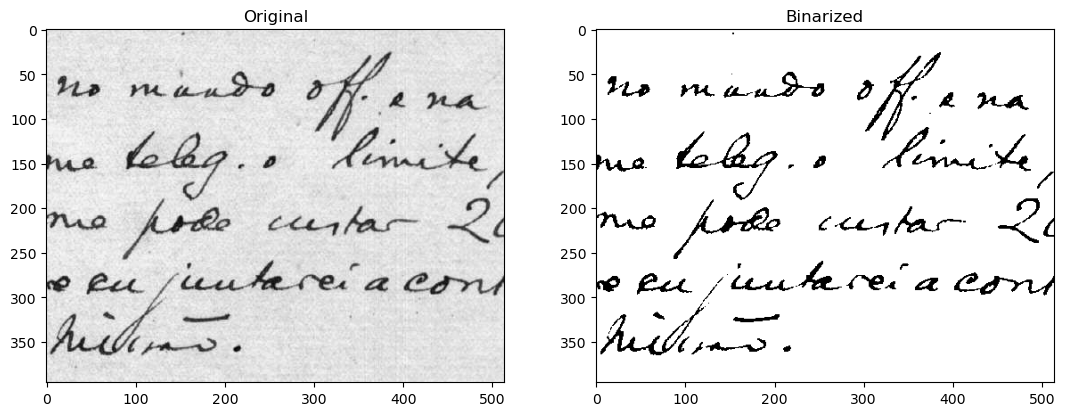

In [8]:
plot(image_3, binarize(image_3, 120))

# Testes

In [9]:
# def mvca_binarization(image):
#     L = np.iinfo(image.dtype).max + 1 
#     histogram = cv2.calcHist(
#         [image], # Lista de imagens
#         [0], # Lista de Canais a serem considerados
#         None, # Máscara, não utilizada
#         [L], # Tamanho do histograma para cada canal 
#         [0, L] # Intervalo de valores a serem considerados
#     )   
#     equalized_image = equalization(image, histogram)
#     histogram_eq = cv2.calcHist(
#         [equalized_image], # Lista de imagens
#         [0], # Lista de Canais a serem considerados
#         None, # Máscara, não utilizada
#         [L], # Tamanho do histograma para cada canal 
#         [0, L] # Intervalo de valores a serem considerados
#     )
#     plot_histogram(['Original', 'Equalized'], [histogram, histogram_eq], L)
    
#     t = np.quantile(equalized_image, 0.1)
#     print('Ponto de corte:', t)
#     plot(image, binarize(equalized_image, t))
    


In [ ]:
def mvca_binarization(image):
    L = np.iinfo(image.dtype).max + 1 
    histogram = cv2.calcHist(
        [image], # Lista de imagens
        [0], # Lista de Canais a serem considerados
        None, # Máscara, não utilizada
        [L], # Tamanho do histograma para cada canal 
        [0, L] # Intervalo de valores a serem considerados
    )   
    
    t = np.quantile(image, 0.1)
    binarized_image = binarize(image, t)

    histogram_binarized = cv2.calcHist(
        [binarized_image], # Lista de imagens
        [0], # Lista de Canais a serem considerados
        None, # Máscara, não utilizada
        [L], # Tamanho do histograma para cada canal 
        [0, L] # Intervalo de valores a serem considerados
    )

    plot_histogram(['Original', 'Binarized'], [histogram, histogram_binarized], L)
    
    print('Ponto de corte:', t)
    plot(image, binarized_image)
    
    return binarized_image, t


In [12]:
def mvca_binarization(image):
    # Calcula o décimo percentil da imagem.
    t = np.quantile(image, 0.1)
    # Realiza a binarização da imagem, função definida anteriormente.
    binarized_image = binarize(image, t)
    
    # Apresenta o resultado e o ponto de corte utilizado.
    print('Ponto de corte:', t)
    plot(image, binarized_image)
    
    return binarized_image, t


In [10]:
def mvca_binarization(image):
    L = np.iinfo(image.dtype).max + 1 
    histogram = cv2.calcHist(
        [image], # Lista de imagens
        [0], # Lista de Canais a serem considerados
        None, # Máscara, não utilizada
        [L], # Tamanho do histograma para cada canal 
        [0, L] # Intervalo de valores a serem considerados
    )   
    
    t = np.quantile(image, 0.1)
    binarized_image = binarize(image, t)

    histogram_binarized = cv2.calcHist(
        [binarized_image], # Lista de imagens
        [0], # Lista de Canais a serem considerados
        None, # Máscara, não utilizada
        [L], # Tamanho do histograma para cada canal 
        [0, L] # Intervalo de valores a serem considerados
    )

    plot_histogram(['Original', 'Binarized'], [histogram, histogram_binarized], L)
    
    print('Ponto de corte:', t)
    plot(image, binarized_image)
    


Ponto de corte: 66.0


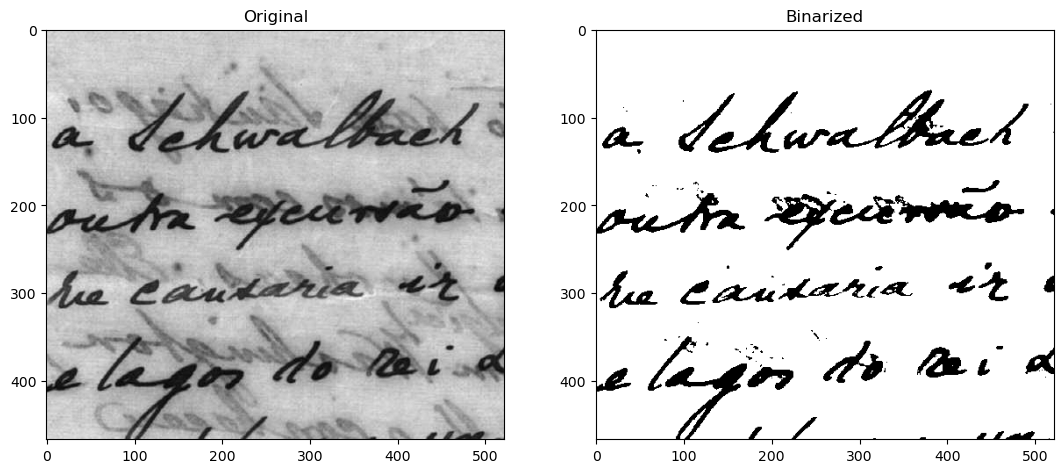

(array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 66.0)

In [13]:
mvca_binarization(image_1)

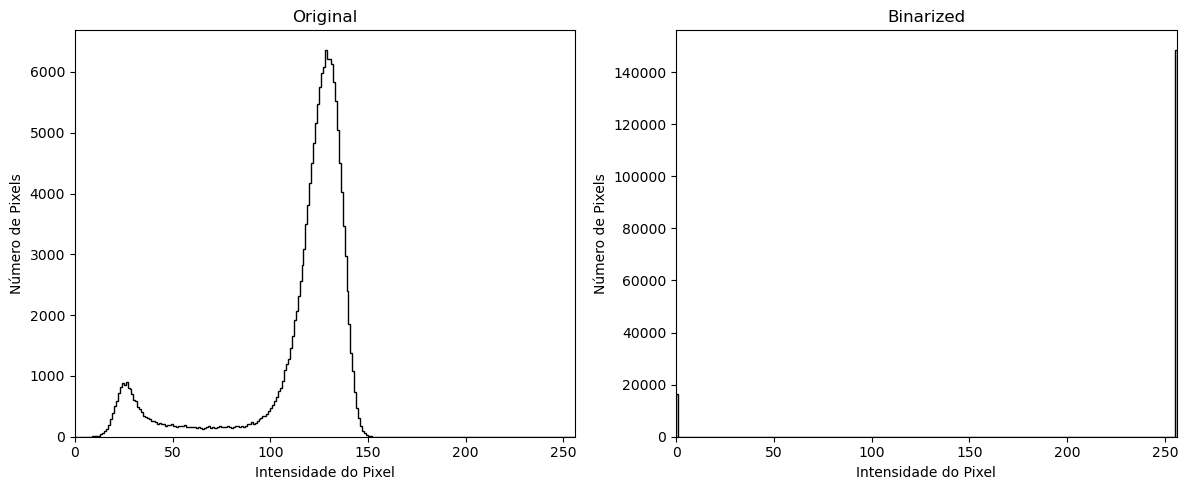

Ponto de corte: 58.0


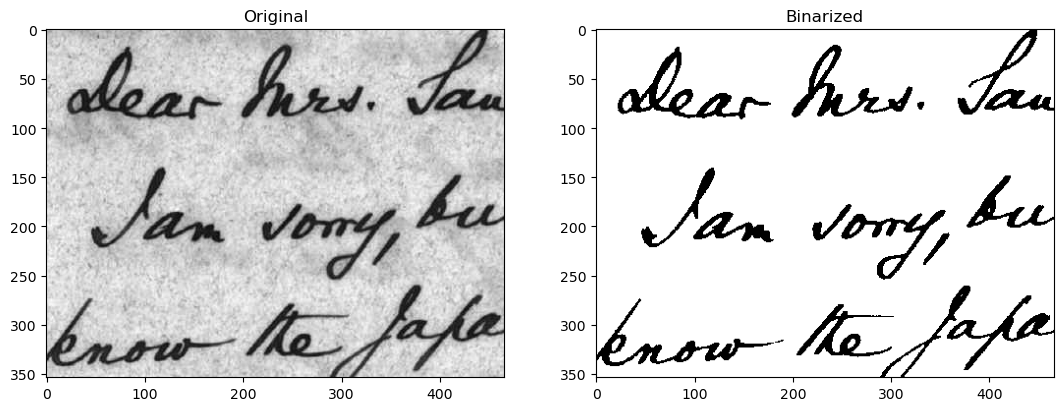

In [17]:
mvca_binarization_2(image_2)

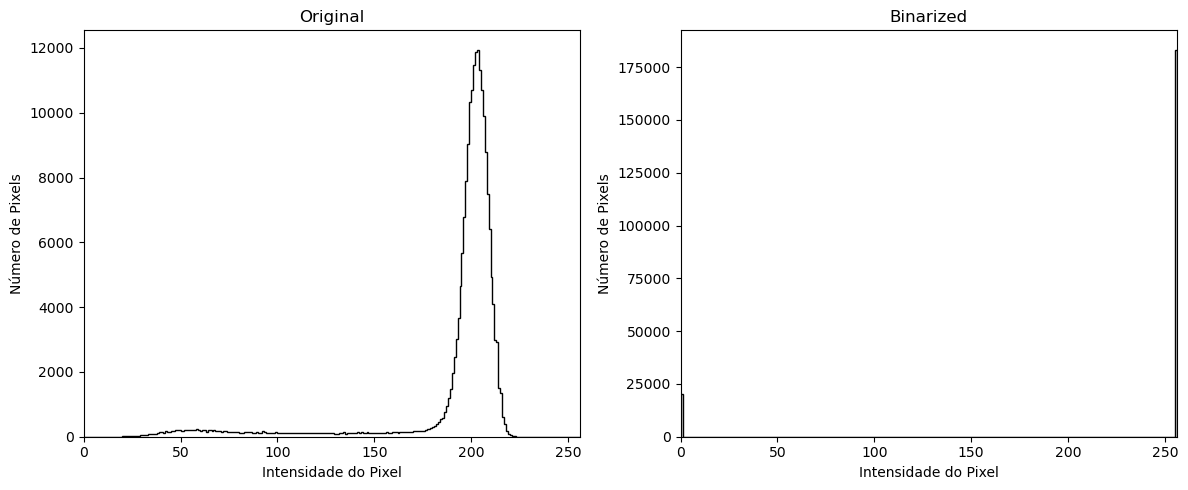

Ponto de corte: 176.0


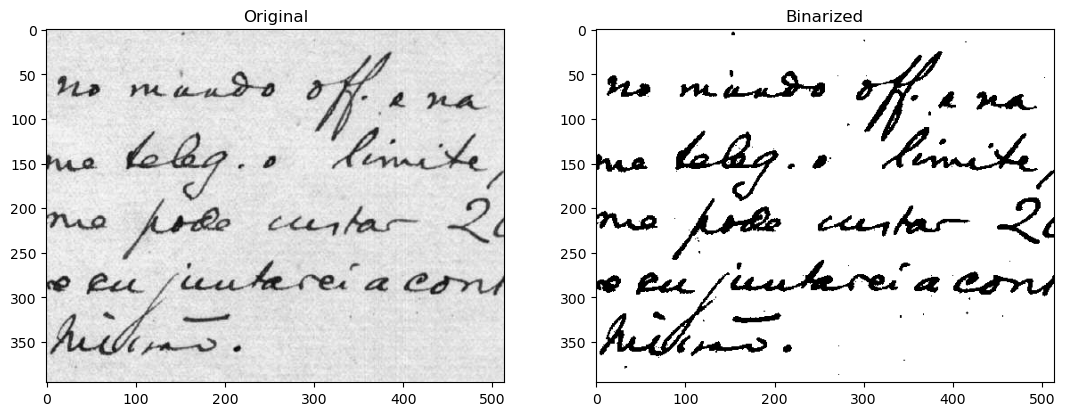

In [18]:
mvca_binarization_2(image_3)